In [1]:
import numpy as np 
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import seaborn as sb
import cv2
import matplotlib.pyplot as plt
import time

In [2]:
train = pd.read_csv("D:/Nour/Semester 7/Machine Learning/Project/fashion-mnist_train.csv")
test = pd.read_csv("D:/Nour/Semester 7/Machine Learning/Project/fashion-mnist_test.csv")

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [5]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
X_train.head(5)
y_train.head(5)

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

C:\Users\Nour\AppData\Local\Temp\ipykernel_23544\3828648237.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(label,rotation = 45)


[Text(0, 0, 'T-shirt/Top'),
 Text(1, 0, 'Trouser'),
 Text(2, 0, 'Pullover'),
 Text(3, 0, 'Dress'),
 Text(4, 0, 'Coat'),
 Text(5, 0, 'Sandal'),
 Text(6, 0, 'Shirt'),
 Text(7, 0, 'Sneaker'),
 Text(8, 0, 'Bag'),
 Text(9, 0, 'Ankle Boot')]

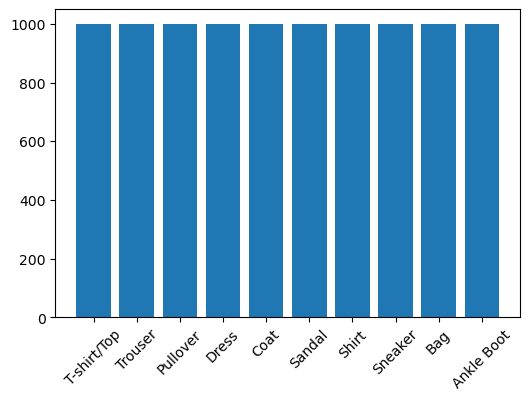

In [14]:
unique = np.unique(np.array(y_test), return_counts=True)
figure = plt.figure(figsize = (6,4))
barplot = figure.add_subplot(111)
barplot.bar(label,unique[1])
barplot.set_xticklabels(label,rotation = 45)

In [6]:
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]
X_test.head(5)
y_test.head(5)

0    0
1    1
2    2
3    2
4    3
Name: label, dtype: int64

In [7]:
X_train /= 255
X_test /= 255

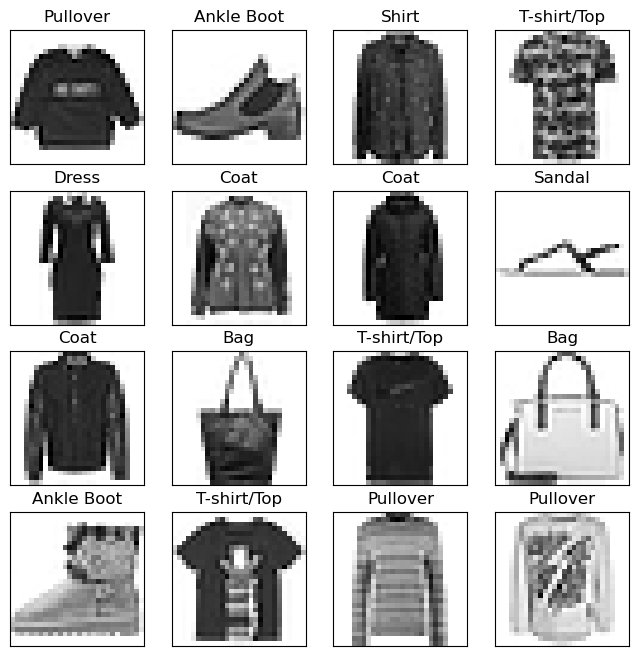

In [17]:
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(X_train.loc[i]).reshape((28,28)), cmap="binary")
    label_index = int(y_train[i])
    plt.title(label[label_index])
plt.show()

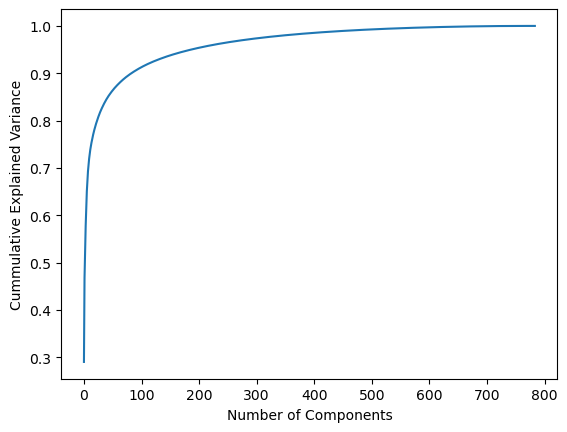

In [8]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Explained Variance');


In [9]:
pca = PCA(n_components=400)
pca.fit(X_train)
X_trainpca = pca.transform(X_train)
X_testpca = pca.transform(X_test)

In [10]:
from pandas import DataFrame 

In [11]:
C = [0.1, 1, 8, 10, 12, 100]
gamma = ['scale', 0.01, 0.1, 1, 10]
accuracytest = []
accuracytrain = []
df = DataFrame(columns=['C','gamma', 'train_acc', 'test_acc'])
k = 0

for i in C:
    for j in gamma:
        SVM = SVC(kernel = 'rbf', C = i, gamma = j   
                     )
        SVM.fit(X_trainpca, y_train)
        y_pred = SVM.predict(X_testpca)
        testacc = accuracy_score(y_test, y_pred)


        y_predtrain = SVM.predict(X_trainpca)
        trainacc = accuracy_score(y_train, y_predtrain)

        accuracytest.append(testacc)
        accuracytrain.append(trainacc)

        print("Accuracy of C ", i," gamma ",j,": ", testacc)
        df.loc[k] = [i, j,trainacc, testacc]
        k += 1




Accuracy of C  0.1  gamma  scale :  0.8641
Accuracy of C  0.1  gamma  0.01 :  0.8569
Accuracy of C  0.1  gamma  0.1 :  0.7664
Accuracy of C  0.1  gamma  1 :  0.1169
Accuracy of C  0.1  gamma  10 :  0.1014
Accuracy of C  1  gamma  scale :  0.8979
Accuracy of C  1  gamma  0.01 :  0.892
Accuracy of C  1  gamma  0.1 :  0.8827
Accuracy of C  1  gamma  1 :  0.2616
Accuracy of C  1  gamma  10 :  0.1017
Accuracy of C  8  gamma  scale :  0.9106
Accuracy of C  8  gamma  0.01 :  0.9078
Accuracy of C  8  gamma  0.1 :  0.8889
Accuracy of C  8  gamma  1 :  0.2907
Accuracy of C  8  gamma  10 :  0.1018
Accuracy of C  10  gamma  scale :  0.9111
Accuracy of C  10  gamma  0.01 :  0.9084
Accuracy of C  10  gamma  0.1 :  0.8888
Accuracy of C  10  gamma  1 :  0.2907
Accuracy of C  10  gamma  10 :  0.1018
Accuracy of C  12  gamma  scale :  0.9114
Accuracy of C  12  gamma  0.01 :  0.9088
Accuracy of C  12  gamma  0.1 :  0.8888
Accuracy of C  12  gamma  1 :  0.2907
Accuracy of C  12  gamma  10 :  0.1018
Accura

In [13]:
df

,C,gamma,train_acc,test_acc
0,0.1,scale,0.866017,0.8641
1,0.1,0.01,0.857050,0.8569
2,0.1,0.1,0.798250,0.7664
3,0.1,1.0,0.846733,0.1169
4,0.1,10.0,1.000000,0.1014
5,1.0,scale,0.920483,0.8979
6,1.0,0.01,0.908250,0.8920
7,1.0,0.1,0.986300,0.8827
8,1.0,1.0,1.000000,0.2616
9,1.0,10.0,1.000000,0.1017


In [15]:
SVM_start = time.time()
SVM = SVC(kernel = 'rbf', C = 12, gamma = 'scale')
SVM.fit(X_trainpca, y_train)
y_pred = SVM.predict(X_testpca)
testacc = accuracy_score(y_test, y_pred)
SVM_end = time.time()


y_predtrain = SVM.predict(X_trainpca)
trainacc = accuracy_score(y_train, y_predtrain)

SVM_time = SVM_end - SVM_start
print("Accuracy of Model:", testacc)
print("Time of Model:", SVM_time)


Accuracy of Model: 0.9114
Time of Model: 425.23679304122925


In [16]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names = label))

              precision    recall  f1-score   support

 T-shirt/Top       0.84      0.88      0.86      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.86      0.83      0.85      1000
       Dress       0.91      0.92      0.92      1000
        Coat       0.85      0.88      0.87      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.79      0.74      0.77      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



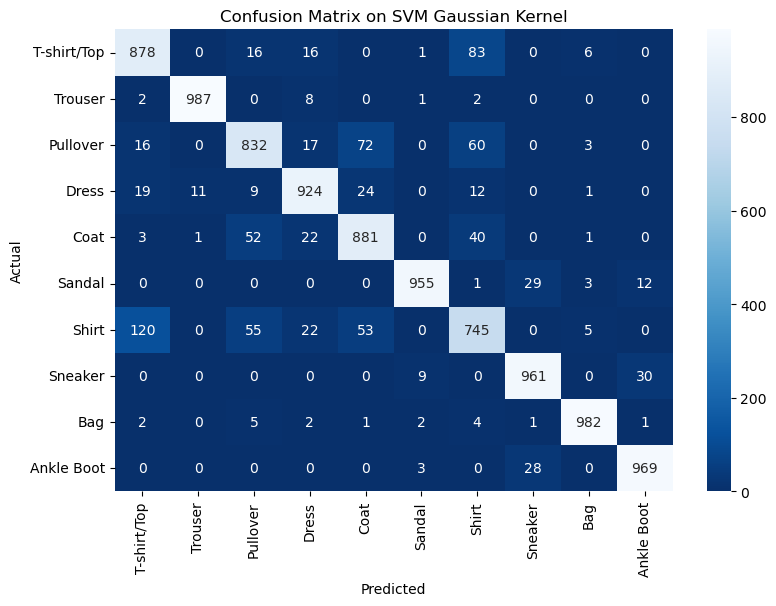

In [18]:
import seaborn as sns
con_matrix = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(con_matrix, label, label)
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on SVM Gaussian Kernel")
sns.heatmap(df, cmap = "Blues_r", annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

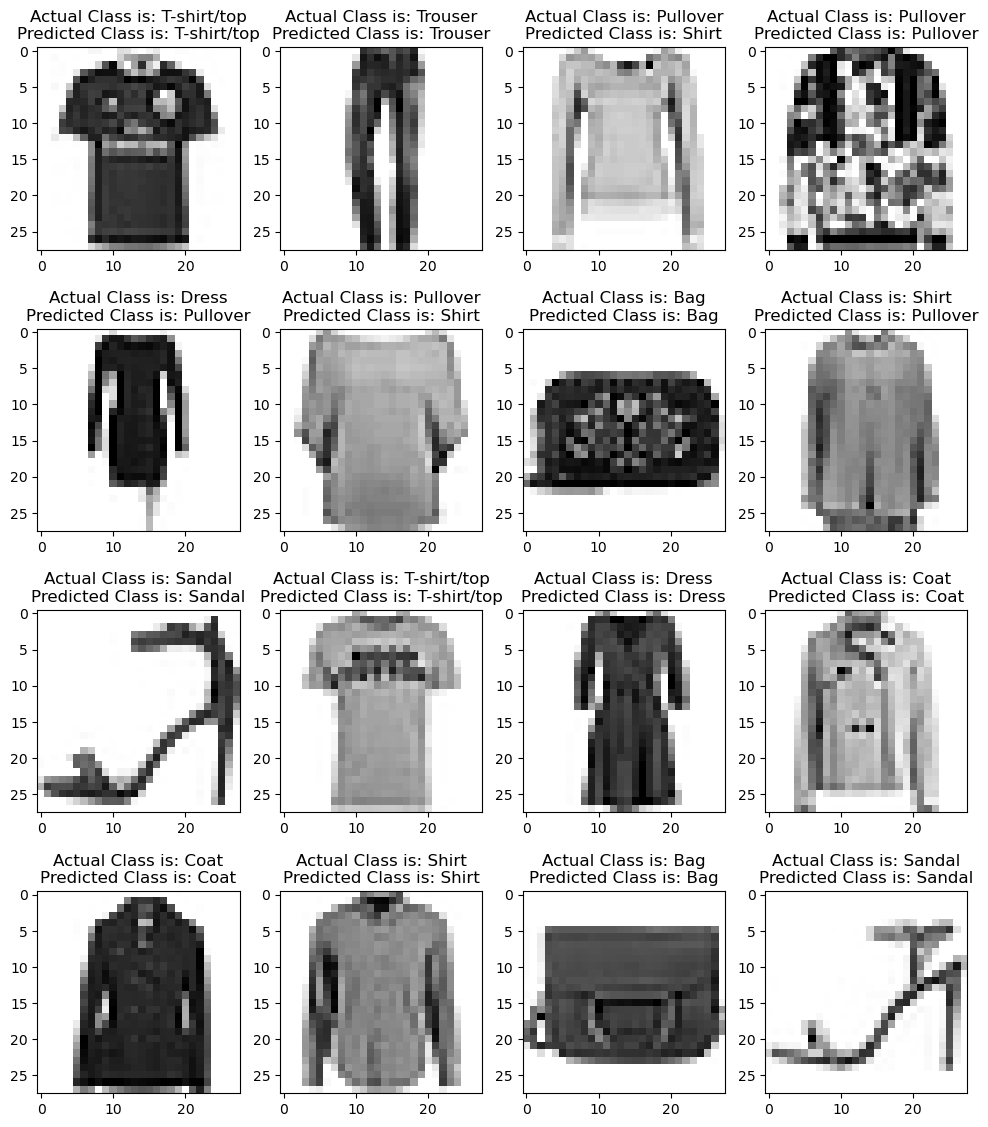

In [19]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

X_test1 = np.array(X_test).reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test1[i], cmap='binary')
    ax.set(title = f"Actual Class is: {labels[y_test[i]]}\nPredicted Class is: {labels[y_pred[i]]}");